### Выпускной проект на тему: Зарплаты в San Francisco

Датасет: https://www.kaggle.com/kaggle/sf-salaries?select=Salaries.csv 

Какие задачи предстоит решить:
    1.	Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)
    2.	Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам
    3.	Как распределяется бюджет на разные группы (department) с течением времени?
    4.	Какое количество людей в каждом департаменте? 
    5.	Какое количество с разным уровнем дохода? (гистограмма с шагом в 5к) 
    6.	На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту

#### 1. Загрузка всех необходимых бибилотек

In [431]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

In [2]:
pd.options.display.max_rows = 100

#### 2. Разведочный анализ данных / Препроцессинг / Знакомство с датасетом

In [3]:
df_salaries = pd.read_csv('C:/Users/user/Desktop/ДЗ Reboot/выпускной проект/Salaries.csv')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_salaries.shape

(148654, 13)

In [5]:
df_salaries.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

Расшифруем столбцы

 0   Id            - ID сотрудника    
 1   EmployeeName  - Имя сотрудника    
 2   JobTitle      - Наименование вакансии    
 3   BasePay       - Базовая оплата труда   
 4   OvertimePay   - Сверхурочная оплата    
 5   OtherPay      - Другие выплаты    
 6   Benefits      - Льготы    
 7   TotalPay      - Общие выплаты    
 8   TotalPayBenefits  - Общие выплаты со льготами  
9   Year          - Год    
 10  Notes         - Примечания    
 11  Agency        - Работодатель    
 12  Status        - Статус

In [6]:
df_salaries.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


In [7]:
df_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [8]:
df_salaries.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [9]:
df_salaries.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109900
OvertimePay          66555
OtherPay             84968
Benefits             99635
TotalPay            138486
TotalPayBenefits    142098
Year                     4
Notes                    0
Agency                   1
Status                   2
dtype: int64

In [10]:
df_salaries.Status.unique()

array([nan, 'PT', 'FT'], dtype=object)

In [11]:
#удаляем не нужные стобцы
df_salaries_clean = df_salaries.drop(['Notes', 'Agency', 'Status'], axis=1)
#удаляем дубликаты
df_salaries_clean = df_salaries_clean.drop_duplicates()
#удаление строк где заполнено значение NaN
df_salaries_clean = df_salaries_clean[~df_salaries_clean['Benefits'].isnull()]

In [12]:
df_salaries_clean

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36160,36161,Gregory Suhr,Chief of Police,302578.0,0.0,18974.11,69810.19,321552.11,391362.30,2012
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.0,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.0,17816.59,72047.88,314759.60,386807.48,2012
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012
...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014


In [13]:
#удаляем значения с нот провайд
df_salaries_clean.EmployeeName.unique()

array(['Gary Altenberg', 'Gregory Suhr', 'Khoa Trinh', ...,
       'Charlene D Mccully', 'Not provided', 'Joe Lopez'], dtype=object)

In [14]:
df_salaries_namenull = df_salaries_clean[df_salaries_clean.EmployeeName == 'Not provided'].shape[0]
df_salaries_namenull

4

In [15]:
df_salaries_clean[df_salaries_clean['EmployeeName'].isin(['Not provided'])]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014


In [16]:
#удаляем строки со значением имения сотрудников - 'Not provided'
df_salaries_clean_1 = df_salaries_clean.drop(labels = [148646, 148650, 148651, 148652], axis = 0)

In [17]:
df_salaries_clean_1[df_salaries_clean_1['EmployeeName'].isin(['Not provided'])]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year


In [18]:
#Удаляем значения Null из столбца с Базовой оплатой
df_salaries_clean_2 = df_salaries_clean_1[~df_salaries_clean_1['BasePay'].isnull()]

In [19]:
df_salaries_clean_2

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36160,36161,Gregory Suhr,Chief of Police,302578.0,0.0,18974.11,69810.19,321552.11,391362.30,2012
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.0,146415.32,78057.41,53102.29,336393.73,389496.02,2012
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.0,17816.59,72047.88,314759.60,386807.48,2012
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012
...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014


In [20]:
#Проверим количество значений после очистки данных
df_salaries_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111886 entries, 36159 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111886 non-null  int64  
 1   EmployeeName      111886 non-null  object 
 2   JobTitle          111886 non-null  object 
 3   BasePay           111886 non-null  object 
 4   OvertimePay       111886 non-null  object 
 5   OtherPay          111886 non-null  object 
 6   Benefits          111886 non-null  object 
 7   TotalPay          111886 non-null  float64
 8   TotalPayBenefits  111886 non-null  float64
 9   Year              111886 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 9.4+ MB


In [21]:
#определяем временной период, за который у нас есть дата сет для анализа
df_salaries_clean_1.groupby('Year')['Id'].count().sort_values(ascending=False).head(10)

Year
2014    38119
2013    37606
2012    36766
Name: Id, dtype: int64

In [22]:
#Проверим количественные данные на предмет выбросов
TotalPay = df_salaries_clean_2.sort_values(by=['TotalPay'], ascending=[False])
TotalPay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
36167,36168,John Goldberg,Captain 3,104404.0,0.0,245999.41,24287.23,350403.41,374690.64,2012
72927,72928,Samson Lai,"Battalion Chief, Fire Suppress",186236.42,131217.63,29648.27,57064.95,347102.32,404167.27,2013
...,...,...,...,...,...,...,...,...,...,...
145528,145529,Timothy C Benetti,Special Assistant 15,0.00,0.00,0.00,5650.86,0.00,5650.86,2014
145934,145935,Ginger D Huey,Community Police Services Aide,0.00,0.00,0.00,4659.36,0.00,4659.36,2014
145935,145936,Mark D Dunlop,"BdComm Mbr, Grp3,M=$50/Mtg",0.00,0.00,0.00,4659.36,0.00,4659.36,2014
145936,145937,Linda F Richardson,"BdComm Mbr, Grp3,M=$50/Mtg",0.00,0.00,0.00,4659.36,0.00,4659.36,2014


In [23]:
TotalPayBenefits = df_salaries_clean_2.sort_values(by=['TotalPayBenefits'], ascending=[False])
TotalPayBenefits

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.0,20007.06,86533.21,339282.07,425815.28,2013
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.0,23236.0,85431.39,336922.01,422353.40,2013
...,...,...,...,...,...,...,...,...,...,...
148629,148630,Elizabeth Iniguez,Transcriber Typist,0.00,0.00,0.00,0.00,0.00,0.00,2014
148628,148629,Mark W Mcclure,General Laborer,0.00,0.00,0.00,0.00,0.00,0.00,2014
148627,148628,Brett A Lundberg,General Laborer,0.00,0.00,0.00,0.00,0.00,0.00,2014
148626,148627,Paulet Gaines,Account Clerk,0.00,0.00,0.00,0.00,0.00,0.00,2014


In [24]:
#преобразовываем столбцы с типом object в float, чтобы можно было отсортировать и посмотреть на выбросы
df_salaries_clean_2['BasePay'] = df_salaries_clean_2['BasePay'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_salaries_clean_2['OvertimePay'] = df_salaries_clean_2['OvertimePay'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_salaries_clean_2['Benefits'] = df_salaries_clean_2['Benefits'].apply(pd.to_numeric, downcast='float', errors='coerce')
df_salaries_clean_2['OtherPay'] = df_salaries_clean_2['OtherPay'].apply(pd.to_numeric, downcast='float', errors='coerce')

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [25]:
#Проверяем результат преобразования типа данных для ряда столбцов
df_salaries_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111886 entries, 36159 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111886 non-null  int64  
 1   EmployeeName      111886 non-null  object 
 2   JobTitle          111886 non-null  object 
 3   BasePay           111886 non-null  float64
 4   OvertimePay       111886 non-null  float64
 5   OtherPay          111886 non-null  float64
 6   Benefits          111886 non-null  float64
 7   TotalPay          111886 non-null  float64
 8   TotalPayBenefits  111886 non-null  float64
 9   Year              111886 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 9.4+ MB


In [26]:
#Проверяем выбросы после изменения типа данных для столбцов BasePay, OvertimePay, Benefits, OtherPay
BasePay = df_salaries_clean_2.sort_values(by=['BasePay'], ascending=[False]).head(5)
BasePay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014
72929,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013
72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013
72931,72932,Harlan L Kelly-Jr,Executive Contract Employee,313312.52,0.00,0.00,82319.51,313312.52,395632.03,2013


In [27]:
OvertimePay = df_salaries_clean_2.sort_values(by=['OvertimePay'], ascending=[False]).head(5)
OvertimePay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012
72964,72965,Whitney P Yee,Deputy Sheriff,95123.00,196689.18,16622.66,36125.49,308434.84,344560.33,2013
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012
110574,110575,Antonio B Santiago,Deputy Sheriff,94191.04,173547.73,19740.81,38238.57,287479.58,325718.15,2014
110577,110578,Barry J Bloom,Deputy Sheriff,94191.13,173178.23,17960.11,38171.49,285329.47,323500.96,2014


In [28]:
Benefits = df_salaries_clean_2.sort_values(by=['Benefits'], ascending=[False]).head(5)
Benefits

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014
110537,110538,John L Martin,Dept Head V,311298.55,0.00,0.00,89772.32,311298.55,401070.87,2014
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014


In [29]:
OtherPay = df_salaries_clean_2.sort_values(by=['OtherPay'], ascending=[False]).head(5)
OtherPay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014
36167,36168,John Goldberg,Captain 3,104404.00,0.00,245999.41,24287.23,350403.41,374690.64,2012
36888,36889,James Harrigan,Chief Atty1 (Civil & Criminal),15158.50,0.00,206752.00,14074.28,221910.50,235984.78,2012
36195,36196,Stephen Tacchini,Captain 3,104404.00,0.00,204290.09,24688.54,308694.09,333382.63,2012
36202,36203,John Ehrlich,Captain 3,98747.52,1386.38,203735.92,23607.08,303869.82,327476.90,2012


In [30]:
#При работе с датафрейм было обнаружено, что в данном столбце имеются отрицательные значения. Руководствуясь здравым смыслом,
#после сортировки отбираем эти строки и удаляем
OtherPay = df_salaries_clean_2.sort_values(by=['OtherPay'], ascending=[True]).head(10)
OtherPay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
84969,84970,Pei Meng,IS Business Analyst-Principal,101274.51,0.00,-7058.590000,34583.40,94215.92,128799.32,2013
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.130005,0.00,-618.13,-618.13,2014
107184,107185,Amelie E Bullard,Special Nurse,6932.50,0.00,-50.190000,418.03,6882.31,7300.34,2013
96168,96169,John G Alexander,Gardener,59733.32,46.76,-46.760000,25863.91,59733.32,85597.23,2013
93200,93201,Jose A Lemus,Custodial Supervisor,66744.00,2234.40,-9.600000,26889.04,68968.80,95857.84,2013
93252,93253,Susan Wong,Senior Water Services Clerk,68067.02,330.87,0.000000,27166.89,68397.89,95564.78,2013
92972,92973,Marilou D Panganiban,Health Care Billing Clerk 2,69417.01,0.00,0.000000,27437.27,69417.01,96854.28,2013
92977,92978,Jasmin Kai,Payroll Clerk,67392.00,2406.30,0.000000,27031.76,69798.30,96830.06,2013
92980,92981,Manuel E Delgado,Gardener,64641.07,5699.64,0.000000,26485.63,70340.71,96826.34,2013
92988,92989,Rita Z Chen,Payroll Clerk,67392.00,2359.34,0.000000,27031.76,69751.34,96783.10,2013


In [31]:
#удаляем строки где значения выплат отрицательные
df_salaries_clean_2 = df_salaries_clean_2.drop(labels = [84969, 148653, 107184, 96168, 93200], axis = 0)

In [32]:
#проверяем то, что необходимые строки удалены
OtherPay = df_salaries_clean_2.sort_values(by=['OtherPay'], ascending=[True]).head(5)
OtherPay

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.0,0.00,0.00,0.00,2014
66682,66683,Stephen Apperson,Water Operations Analyst,19800.00,0.00,0.0,1530.27,19800.00,21330.27,2012
66683,66684,Jeremy Menzies,Publ Svc Aide-Asst to Prof,16873.25,0.00,0.0,4451.39,16873.25,21324.64,2012
66684,66685,Marc Czornij,Clerk,16852.24,2552.43,0.0,1912.91,19404.67,21317.58,2012
66685,66686,Jutinut Pholsith,Senior Clerk Typist,19776.96,0.00,0.0,1536.08,19776.96,21313.04,2012


In [33]:
#Для решения поставленной задачи и получения инсайтов в данных необходимо произвести разметку данных на следующие группы
#fire, medicine, police, other (те позиции работников, которые не относятся ни к одной из трех категорий)
#Not dep (категория, которую при разметке данных нельзя был отнести однозначно к любой из 4 категорий перечисленных выше)
#для начала группируем по столбцу JobTitle, чтобы определить самых массовых работников
df_salaries_clean_2.groupby('JobTitle')['Id'].count().sort_values(ascending=False).head(10)

JobTitle
Transit Operator                6975
Special Nurse                   4381
Registered Nurse                3725
Public Svc Aide-Public Works    2514
Police Officer 3                2411
Custodian                       2409
Firefighter                     2348
Recreation Leader               1968
Patient Care Assistant          1940
Deputy Sheriff                  1914
Name: Id, dtype: int64

In [34]:
vacs = df_salaries_clean_2.groupby('JobTitle')['Id'].count().sort_values(ascending=False).head(10)

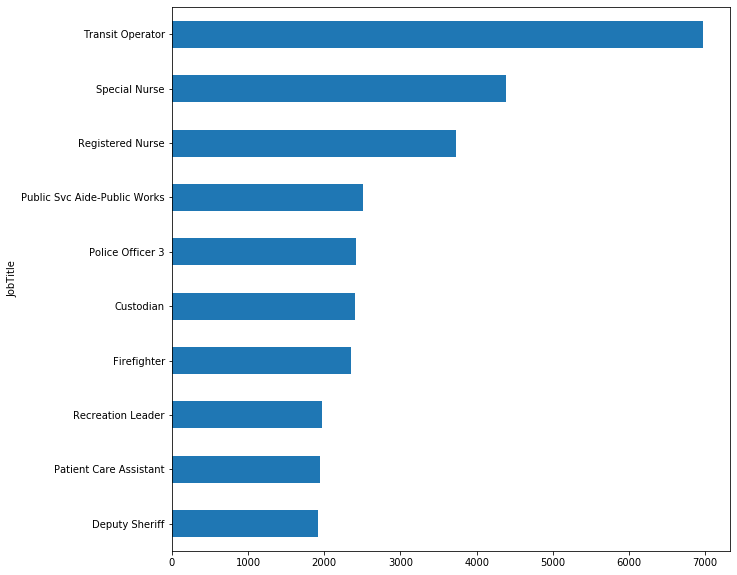

In [35]:
#топ - 10 самых частовстречающихся профессий
rcParams['figure.figsize'] = 10,10
vacs.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [36]:
#Так как данные о названиях профессий разнородные и без ручной обработки их разметить трудно (для junior) составляем несколько 
#словарей, и в ручную классифицируем такие данные
dep_dict ={'Police Officer 3' : 'Police',
           'Public Svc Aide-Public Works' : 'Police',
           'Custodian' : 'Police',
           'Deputy Sheriff' : 'Police',
           'Police Officer' : 'Police',
           'Public Service Trainee' : 'Police',
           'Police Officer 2' : 'Police',
           'Attorney (Civil/Criminal)' : 'Police',
           'Sergeant 3' : 'Police',
           'Parking Control Officer' : 'Police',
           'Senior Clerk' : 'Police',
           'Senior Administrative Analyst' : 'Police',
           'Protective Services Worker' : 'Police',
           'Transit Supervisor' : 'Police',
           'Publ Svc Aide-Asst to Prof' : 'Police',
           'Community Police Services Aide' : 'Police',
           'School Crossing Guard' : 'Police',
           'Public Safety Comm Disp' : 'Police',
           'Deputy Probation Officer' : 'Police',
           'Inspector 3' : 'Police',
           'Counselor, Juvenile Hall' : 'Police',
           'Lieutenant 3' : 'Police',
           'IS Business Analyst-Principal' : 'Police',
           'Deputy Court Clerk II' : 'Police',
           'Marriage, Family & Child Cnslr' : 'Police',
           'Senior Deputy Sheriff' : 'Police',
           'Unit Clerk' : 'Police',
           'Sr Payroll & Personnel Clerk' : 'Police',
           'Deputy Court Clerk III' : 'Police',
           'Junior Administrative Analyst' : 'Police',
           "Sheriff's Cadet" : 'Police',
           'Executive Secretary 1' : 'Police',
           'Legal Secretary 1' : 'Police',
           'Child Support Officer II' : 'Police',
           'Employment & Training Spec 3' : 'Police',
           'Custodial Assistant Supervisor' : 'Police',
           'IS Engineer-Journey' : 'Police',
           'Transit Fare Inspector' : 'Police',
           'Bldg & Grounds Patrol Officer' : 'Police',
           'Utility Specialist' : 'Police',
           "Sheriff's Sergeant" : 'Police',
           'Senior Management Assistant' : 'Police',
           'Senior Legal Process Clerk' : 'Police',
           'General Laborer Supervisor 1' : 'Police',
           'Commissioner No Benefits' : 'Police',
           'Maintenance Machinist' : 'Police',
           'Head Atty, Civil & Criminal' : 'Police',
           'Sergeant 2' : 'Police',
           'Airport Safety Officer' : 'Police',
           'Legislative Assistant' : 'Police',
           'Senior Collections Officer' : 'Police',
           'Protective Services Supervisor' : 'Police',
           'Communications Dispatcher 1 ' : 'Police',
           "Sheriff's Lieutenant" : 'Police',
           'Court Reporter' : 'Police',
           'Superior Court Judge' : 'Police',
           'Senior Parking Control Officer' : 'Police',
           'DA Investigative Assist' : 'Police',
           'Contract Compliance Officer 1' : 'Police',
           'Legal Assistant' : 'Police',
           'Security Guard' : 'Police',
           'Deputy Sheriff 1' : 'Police',
           'Estate Investigator' : 'Police',
           'Public Safety Comm Supv' : 'Police',
           'Park Patrol Officer' : 'Police',
           'Assistant Chief Attorney 1' : 'Police',
           'Street Inspector' : 'Police',
           'Permit and Citation Clerk' : 'Police',
           'Training Officer' : 'Police',
           'Environmental Health Inspector' : 'Police',
           'Personnel Clerk' : 'Police',
           'Public Relations Officer' : 'Police',
           'Victim/Witness Investigator 1' : 'Police',
           'ASR Senior Office Specialist' : 'Police',
           'Accountant Intern ' : 'Police',
           'Snr Permit and Citation Clerk' : 'Police',
           'Housing Inspector' : 'Police',
           'Legal Process Clerk' : 'Police',
           'Assistant Const Inspector' : 'Police',
           'Project Manager 2' : 'Police',
           'Counselor, Juvenile Hall SFERS' : 'Police',
           'Sr Statnry Eng, Wtr Treat Plnt' : 'Police',
           'Pr Payroll & Personnel Clerk' : 'Police',
           'Personal Property Auditor' : 'Police',
           'Deputy Probation Officer SFERS' : 'Police',
           'Criminalist II' : 'Police',
           'Manager V, MTA' : 'Police',
           "District Attry's Investigator" : 'Police',
           'Sr Personal Property Auditor' : 'Police',
           'Fingerprint Technician 2' : 'Police',
           'Public Service Aide-Admin' : 'Police',
           'Victim/Witness Investigator 3' : 'Police',
           'Traffic Survey Technician' : 'Police',
           'Court Supervisor II' : 'Police',
           'Special Nurse' : 'Medicine',
           'Registered Nurse' : 'Medicine',
           'Custodian' : 'Medicine',
           'Recreation Leader' : 'Medicine',
           'Patient Care Assistant' : 'Medicine'
          }

In [37]:
dep_dict_2 ={'Licensed Vocational Nurse' : 'Medicine',
           'Nurse Practitioner' : 'Medicine',
           'Medical Evaluations Assistant' : 'Medicine',
           'Assoc Engineer' : 'Medicine',
           'Health Worker 3' : 'Medicine',
           'Health Worker 2' : 'Medicine',
           'Physician Specialist' : 'Medicine',
           'Senior Physician Specialist' : 'Medicine',
           'Nursing Assistant' : 'Medicine',
           'Psychiatric Social Worker' : 'Medicine',
           'PS Aide Health Services' : 'Medicine',
           'Medical Social Worker' : 'Medicine',
           'Secretary 2' : 'Medicine',
           'Nurse Manager' : 'Medicine',
           'Hospital Eligibility Worker' : 'Medicine',
           'Senior Social Worker' : 'Medicine',
           'Pharmacy Technician' : 'Medicine',
           'Public Health Nurse' : 'Medicine',
           'Health Care Billing Clerk 2' : 'Medicine',
           'Accountant IV' : 'Medicine',
           'Health Program Coordinator 3' : 'Medicine',
           'Physical Therapist' : 'Medicine',
           'Pharmacist' : 'Medicine',
           'Admission Attendant' : 'Medicine',
           'Health Worker 1' : 'Medicine',
           'Medical Records Clerk' : 'Medicine',
           'Clinical Psychologist' : 'Medicine',
           'Camp Assistant' : 'Medicine',
           'Occupational Therapist' : 'Medicine',
           'Home Health Aide' : 'Medicine',
           'HSA Social Worker' : 'Medicine',
           'Clinical Pharmacist' : 'Medicine',
           'Nursing Supervisor' : 'Medicine',
           'Medical Records Technician' : 'Medicine',
           'Psychiatric Technician' : 'Medicine',
           'IT Operations Support Admin IV' : 'Medicine',
           'Real Property Appraiser' : 'Medicine',
           'X-Ray Laboratory Aide' : 'Medicine',
           'Health Worker 4' : 'Medicine',
           'Sr Psychiatric Social Worker' : 'Medicine',
           'Elections Clerk' : 'Medicine',
           'Secretary 1' : 'Medicine',
           'Captain, Emergency Med Svcs' : 'Medicine',
           'Nutritionist' : 'Medicine',
           'Dietitian' : 'Medicine',
           'Clinical Nurse Specialist' : 'Medicine',
           'Anesthetist' : 'Medicine',
           'Health Program Coordinator 2' : 'Medicine',
           'Assistant Retirement Analyst' : 'Medicine',
           'Physician Assistant' : 'Medicine',
           'Epidemiologist 2' : 'Medicine',
           'Social Work Supervisor' : 'Medicine',
           'Health Care Analyst' : 'Medicine',
           'Nurses Staffing Assistant' : 'Medicine',
           'Hospital Eligibility Worker' : 'Medicine',
           'Recreation Specialist' : 'Medicine',
           'Special Examiner' : 'Medicine',
           'Nurse Midwife' : 'Medicine',
           'Dental Aide' : 'Medicine',
           'Supervising Physician Spec' : 'Medicine',
           'Patient Svcs Finance Tech' : 'Medicine',
           'Surgical Procedures Technician' : 'Medicine',
           'Patient Accounts Clerk' : 'Medicine',
           'Rehabilitation Svcs Coord' : 'Medicine',
           'Health Educator' : 'Medicine',
           'Contract Compliance Officer 2' : 'Medicine',
           'Animal Care Attendant' : 'Medicine',
           'Dentist' : 'Medicine',
           'Environmental Hlth Tech 1' : 'Medicine',
           'Public Health Team Leader' : 'Medicine',
           'Public Service Aide-Admin' : 'Medicine',
           'Biologist I/II' : 'Medicine',
           'Speech Pathologist' : 'Medicine',
           'Firefighter' : 'Fire',
           'Transit Operator' : 'Fire',
           'Stationary Engineer' : 'Fire',
           'Lieutenant, Fire Suppression' : 'Fire',
           'Senior Eligibility Worker' : 'Fire',
           'Pr Administrative Analyst' : 'Fire',
           'HSA Sr Eligibility Worker' : 'Fire',
           'Administrative Analyst' : 'Fire',
           'Senior Personnel Analyst' : 'Fire',
           'Accountant II' : 'Fire',
           'Captain, Fire Suppression' : 'Fire',
           'Program Specialist' : 'Fire',
           'Recreation Coordinator' : 'Fire',
           'Executive Secretary 2' : 'Fire',
           'Payroll Clerk' : 'Fire',
           'Social Worker' : 'Fire',
           'Testing Technician' : 'Fire',
           'Statnry Eng Water Treat Plant' : 'Fire',
           'Senior Water Services Clerk' : 'Fire',
           'Senior Personnel Clerk' : 'Fire',
           'Captain 3' : 'Fire',
           'Engineering Associate 1' : 'Fire',
           'Social Work Specialist' : 'Fire',
           'Dep Dir II' : 'Fire',
           'Sewer Service Worker' : 'Fire',
           'Track Maintenance Worker' : 'Fire',
           'Claims Investigator, CA' : 'Fire',
           'Senior Telephone Operator' : 'Fire',
           'Central Processing & Dist Tech' : 'Fire',
           'Communications Dispatcher 2' : 'Fire',
           'Water Service Inspector' : 'Fire',
           'Maintenance Planner' : 'Fire',
           'Electrical Inspector' : 'Fire',
           "Worker's Compensation Adjuster" : 'Fire',
           'Insp, Fire Dept' : 'Fire',
           'Arborist Technician' : 'Fire',
           'Dep Dir IV' : 'Fire',
           'Environmental Assistant' : 'Fire',
           'Electrical Line Helper' : 'Fire',
           'Executive Secretary 3' : 'Fire',
           'Battalion Chief, Fire Suppress' : 'Fire',
           'Environmental Spec' : 'Fire',
           'Lighting Fixture Maint Worker' : 'Fire',
           'Plumbing Inspector' : 'Fire',
           'Employment & Training Spec 1' : 'Fire',
           'Electr Maint Tech Asst Sprv' : 'Fire',
           'Engineering Assistant' : 'Fire',
           'Senior Const Inspector' : 'Fire',
           'Planner 4-Environmental Review' : 'Fire',
           'Auditor II' : 'Fire',
           'Public Information Officer' : 'Fire',
           'Research Asst, Superior Court' : 'Fire',
           'Porter' : 'Other',
           'General Laborer' : 'Other',
           'Gardener' : 'Other',
           'Library Page' : 'Other',
           'Clerk' : 'Other',
           'Senior Clerk Typist' : 'Other',
           'PS Aide to Prof' : 'Other',
           'Museum Guard' : 'Other',
           'Junior Clerk' : 'Other',
           'Food Service Worker' : 'Other',
           'Librarian 1' : 'Other',
           'Truck Driver' : 'Other',
           'Engineer' : 'Other',
           'Automotive Mechanic' : 'Other',
           'Manager III' : 'Other',
           'Manager II' : 'Other',
           'Manager I' : 'Other',
           'Pool Lifeguard' : 'Other',
           'Painter' : 'Other',
           'Principal Clerk' : 'Other',
           'Clerk Typist' : 'Other',
           'Automotive Service Worker' : 'Other',
           'Manager IV' : 'Other',
           'Electrician' : 'Other',
           'Library Assistant' : 'Other',
           'Accountant III' : 'Other',
           'IS Engineer-Senior' : 'Other',
           'Transit Car Cleaner' : 'Other',
           'Account Clerk' : 'Other',
           'IS Business Analyst-Senior' : 'Other',
           'Manager V' : 'Other',
           'Management Assistant' : 'Other',
           'Library Technical Assistant 1' : 'Other',
           'Personnel Analyst' : 'Other',
           'Carpenter' : 'Other',
           'Automotive Machinist' : 'Other',
           'Junior Engineer' : 'Other',
           'Customer Service Agent' : 'Other',
           'Plumber' : 'Other',
           'Manager VI' : 'Other',
           'Swimming Instructor' : 'Other',
           'Construction Inspector' : 'Other',
           'Housekeeper/Food Service Clnr' : 'Other',
           'Utility Plumber' : 'Other',
           'Planner 3' : 'Other',
           'Librarian 2' : 'Other',
           'Building Inspector' : 'Other',
           'Station Agent, Muni Railway' : 'Other',
           'IS Engineer-Principal' : 'Other',
           'IS Business Analyst' : 'Other',
           'Sr. Community Devl Spc' : 'Other',
           'IS Project Director' : 'Other',
           'IT Operations Support Admn III' : 'Other',
           'Operating Engineer, Universal' : 'Other',
           'Junior Management Assistant' : 'Other',
           'Sr. Stationary Eng, Sew Plant' : 'Other',
           'Principal Account Clerk' : 'Other',
           'IS Administrator 2' : 'Other',
           'Environmental Service Worker' : 'Other',
           'Storekeeper' : 'Other',
           'Parts Storekeeper' : 'Other',
           'Human Services Technician' : 'Other',
           'Planner 2' : 'Other',
           'Park Section Supervisor' : 'Other',
           'Senior Stationary Engineer' : 'Other',
           'Library Technical Assistant 2' : 'Other',
           'Cook' : 'Other',
           'Sheet Metal Worker' : 'Other',
           'Engineer/Architect Principal' : 'Other',
           'Watershed Worker (Seasonal)' : 'Other',
           'Airport Communications Disp' : 'Other',
           'Utility Plumber Supervisor 1' : 'Other',
           'Sr Community Dev Spec 2' : 'Other',
           'Engineering Associate 2' : 'Other',
           'IS Programmer Analyst-Senior' : 'Other',
           'Planner 3-Environmental Review' : 'Other',
           'Watershed Keeper' : 'Other',
           'Sign Worker' : 'Other',
           'Apprentice Gardener' : 'Other',
           'Cashier 2' : 'Other',
           'Manager II, MTA' : 'Other',
           'Manager IV, MTA' : 'Other',
           'Benefits Technician' : 'Other',
           'Manager VII' : 'Other',
           'Manager VIII' : 'Other',
           'IT Operations Support Admin II' : 'Other',
           'Assistant Storekeeper' : 'Other',
           'Stage Electrician' : 'Other',
           'Program Support Analyst' : 'Other',
           'Parking Meter Repairer' : 'Other',
           'Senior Food Service Worker' : 'Other',
           'Planner 4' : 'Other',
           'Utility Analyst' : 'Other',
           'Counselor, Log Cabin Ranch' : 'Other',
           'Prnpl Admin Analyst II' : 'Other',
           'Institution Utility Worker' : 'Other',
           'Asphalt Worker' : 'Other',
           'IS Administrator 3' : 'Other',
           'Cashier 1' : 'Other',
           'Transit Power Line Worker' : 'Other',
           'Community Development Spec' : 'Other',
           'Project Manager 1' : 'Other',
           'IS Prg Analyst-Principal' : 'Other',
           'Architectural Associate 2' : 'Other',
           'Invstgtor Ofc Citizen Cmplnts' : 'Other',
           'Librarian 3' : 'Other',
           'Window Cleaner' : 'Other',
           'Swimming Instr/Pool Lifeguard' : 'Other',
           'Airport Electrician' : 'Other',
           'Car and Auto Painter' : 'Other',
           'Architectural Assistant 2' : 'Other',
           'Dep Dir V' : 'Other',
           'Commercial Div Asst Sprv' : 'Other',
           'Museum Preparator' : 'Other',
           'Manager VI, MTA' : 'Other',
           'Train Controller' : 'Other',
           'Chief Clerk' : 'Other',
           'Chemist I/II' : 'Other',
           'Benefits Analyst' : 'Other',
           'Senior Real Property Appraiser' : 'Other',
           'Planner 1' : 'Other',
           'Chief Stationary Engineer' : 'Other',
           'Pile Worker' : 'Other',
           'Electrical Line Worker' : 'Other',
           'ASR-Office Assistant' : 'Other',
           'Architect' : 'Other',
           'Aprntc Statnry Eng, Sew Plant' : 'Other',
           'Performance Analyst II' : 'Other',
           'Landscape Architect Assoc 1' : 'Other',
           'Industrial Hygienist' : 'Other',
           'Sr Counselor, Juvenile Hall' : 'Other',
           'Painter Supervisor 1' : 'Other',
           'Utility Plumber Apprentice' : 'Other',
           'Library Page ' : 'Not dep',
           'Eligibility Worker' : 'Not dep',
           'Electrical Transit System Mech' : 'Not dep',
           'Asst Engr' : 'Not dep',
           'Stationary Eng, Sewage Plant' : 'Not dep',
           'Senior Account Clerk' : 'Not dep',
           'Electronic Maintenance Tech' : 'Not dep',
           'StdntDsgnTrain1, Arch/Eng/Plng' : 'Not dep',
           'Eng/Arch/Landscape Arch Sr' : 'Not dep',
           'StdntDsgnTrain3, Arch/Eng/Plng' : 'Not dep',
           'Eligibility Worker Supervisor' : 'Not dep',
           'StdntDsgn Train2/Arch/Eng/Plng' : 'Not dep',
           'BdComm Mbr, Grp 5,M$100/Mo' : 'Not dep',
           'Fare Collections Receiver' : 'Not dep',
           'Diagnostic Imaging Tech I' : 'Not dep',
           'BdComm Mbr, Grp 2,M=$25/Mtg' : 'Not dep',
           'BdComm Mbr, Grp 3,M=$50/Mtg' : 'Not dep',
           'Dep Dir III' : 'Not dep',
           'Cement Mason' : 'Not dep',
           'Sr Environmental Hlth Insp' : 'Not dep',
           'Diagnostic Imaging Tech II' : 'Not dep',
           'Emp & Training Spec 2' : 'Not dep',
           'Assistant Purchaser' : 'Not dep',
           'Communications Systems Tech' : 'Not dep',
           'Electric Trnst Mech, Asst Sprv' : 'Not dep',
           'Water QualityTech I/II' : 'Not dep',
           'Emp & Training Spec 4 ' : 'Not dep',
           'Cable Splicer' : 'Not dep',
           'Sr. Environmental Spec' : 'Not dep',
           'Traffic Signal Electrician' : 'Not dep',
           'Media Production Tech' : 'Not dep',
           'Bldgs & Grounds Maint Supt' : 'Not dep',
           'Electr Instrmntn Tech Wtr Poll' : 'Not dep',
           'Chf Stationary Eng, Sew Plant' : 'Not dep',
           'Steamfitter' : 'Not dep',
           'Sr Fare Collections Receiver' : 'Not dep'
            }

In [38]:
dep_dict_3 ={
           'Sprv Adult Probation Ofc' : 'Not dep',
           'Meter Reader' : 'Not dep',
           'Street Environ Svcs Oprs Supv' : 'Not dep',
           'Purchaser' : 'Not dep',
           'Diagnostic Imaging Tech III' : 'Not dep',
           'Sewage Treatment Plant Supt ' : 'Not dep',
           'Aquatics Facility Asst Supv' : 'Not dep',
           'Diagnostic Imaging Tech IV' : 'Not dep',
           'Water Quality Tech III' : 'Not dep',
           'Track Maint Wrk Sprv 1' : 'Not dep',
           'Brd Comm Mbr, M=$200/Mtg' : 'Not dep',
           'Sr Power Generation Tech' : 'Not dep',
           'Janitorial Svcs Asst Sprv' : 'Not dep',
           'Asst Chf Victim/Wit Invstgtor' : 'Not dep',
           'Chf Statnry Eng,Wtr Treat Plnt' : 'Not dep',
           'Marina Assistant Manager' : 'Not dep',            
           'Sergeant, (Police Department)' : 'Police',
           'Legal Secretary 2' : 'Police',
           'Safety Analyst' : 'Police',
           'Regulatory Specialist' : 'Police',
           'Member, Board of Supervisors' : 'Police',
           'Institutional Police Officer' : 'Police',
           "Public Defender's Investigator" : 'Police',
           'Citizens Complaint Officer' : 'Police',
           'Court Interpreter' : 'Police',
           'Child Support Officer III' : 'Police',
           'Porter Supervisor 1' : 'Police',
           'Deputy Court Clerk I' : 'Police',
           'Custodial Supervisor' : 'Police',
           'Admin Hearing Examiner' : 'Police',
           'Trans Safety Specialist' : 'Police',
           'Sr Marriage, Fam & Cld Cnslr' : 'Police',
           'Senior Industrial Hygienist' : 'Police',
           'Auditor III' : 'Police',
           'Dist Atty Investigator (SFERS)' : 'Police',
           'Investigator, Tax Collector' : 'Police',
           "Sheriff's Property Keeper" : 'Police',
           "Med Examiner's Investigator II" : 'Police',
           'Fingerprint Technician 1' : 'Police',
           "Med Examiner's Investigator I" : 'Police',
           "Sheriff's Captain" : 'Police',
           'Safety Officer' : 'Police',
           'Sr Public Defenders Invstgtor' : 'Police',
           'Sprv Prob Ofc, Juv Court' : 'Police',
           'Investigator,Taxi & AccessSvcs' : 'Police',
           'Auto Machinist Asst Sprv' : 'Police',
           'Prpl Permit and Citation Clerk' : 'Police',
           'Dep Dir I' : 'Police',
           'Claims Investigator' : 'Police',
           'Incident Support Specialist' : 'Police',
           'Victim/Witness Investigator 2' : 'Police',
           'Inspector, Weights & Measures' : 'Police',
           'Sr District Atty Investigator' : 'Police',
           'Public Relations Assistant' : 'Police',
           'Chief Surveyor' : 'Police',
           'Parking Hearing Examiner' : 'Police',
           'Court Staff Attorney II' : 'Police',
           'Assistant Chief Attorney 2' : 'Police',
           'Benefits Supervisor' : 'Police',
           'Asst Forensic Toxicologist 1' : 'Police',
           'Urban Forestry Inspector' : 'Police',
           'Criminal Justice Specialist 2' : 'Police',
           'Assistant Inspector 3' : 'Police',
           'Claims Adjuster' : 'Police',
           'Welfare Fraud Investigator' : 'Police',
           'Court Manager' : 'Police',
           'Deputy Sheriff (SFERS)' : 'Police',
           'Counselor,Log Cabin Rnch SFERS' : 'Police',
           'Rep, Human Rights Comm' : 'Police',
           'Senior Housing Inspector' : 'Police',
           'Counselor, Family Court Svc' : 'Police',
           'SrClaimsInvstgtor,Cty Atty Ofc' : 'Police',
           'Security Analyst' : 'Police',
           'Patient Accounts Asst Sprv' : 'Police',
           'Pr Personal Property Auditor' : 'Police',
           'Chief Atty 1 (Civil & Criminal)' : 'Police',
           'Criminalist III' : 'Police',         
           'Survey Associate' : 'Medicine',
           'Senior Purchaser' : 'Medicine',
           'Animal Control Officer' : 'Medicine',
           'Shelter Service Rep' : 'Medicine',
           'Therapy Aide' : 'Medicine',
           'Survey Assistant II' : 'Medicine',
           'Survey Assistant I' : 'Medicine',
           'Volunteer/Outreach Coord' : 'Medicine',
           'Health Care Billing Clerk 1' : 'Medicine',
           'Health Program Coordinator 1' : 'Medicine',
           'Senior Benefits Analyst' : 'Medicine',
           'Recreation Supervisor' : 'Medicine',
           'Senior Health Program Planner' : 'Medicine',
           'Health Program Planner' : 'Medicine',
           'Hospital Elig Wrk Supervisor' : 'Medicine',
           'Disease Control Investigator' : 'Medicine',
           'Assistant Health Educator' : 'Medicine',
           'Biologist' : 'Medicine',
           'Respiratory Care Practitioner' : 'Medicine',
           'Dept Head II' : 'Medicine',
           'Transit Manager 1' : 'Medicine',
           'Supervising Pharmacist' : 'Medicine',
           'Emergency Med Svcs Agency Spec' : 'Medicine',
           'Dept Head V' : 'Medicine',
           'Microbiologist' : 'Medicine',
           'Auditor I' : 'Medicine',
           'Patient Accounts Supervisor' : 'Medicine',
           'Child Care Specialist' : 'Medicine',
           'Biologist III' : 'Medicine',
           'Supv Biologist' : 'Medicine',
           'Pharmacy Helper' : 'Medicine',
           'Dietetic Technician ' : 'Medicine',
           'Pr Environmental Hlth Insp' : 'Medicine',
           'Senior Medical Social Worker' : 'Medicine',
           'Rehabilitation Counselor' : 'Medicine',
           'Senior Physical Therapist' : 'Medicine',
           'Mental Hlth Treatment Spec' : 'Medicine',
           'Physical Therapist Assistant' : 'Medicine',
           'Nursery Specialist' : 'Medicine',
           'Recreation Director' : 'Medicine',
           'Medical Transcriber Typist' : 'Medicine',
           'Med Staff Svcs Dept Spc' : 'Medicine',            
           'Battlion Chief, Fire Suppressi' : 'Fire',
           'Water Operations Analyst' : 'Fire',
           'Dept Head I' : 'Fire',
           'Employee Relations Representat' : 'Fire',
           'Water Quality Technician' : 'Fire',
           'Fire Safety Inspector 2' : 'Fire',
           'Employment & Training Spec 5' : 'Fire',
           'Administrative Engineer' : 'Fire',
           'Lieut,Fire Prev' : 'Fire',
           'Maintenance Controller' : 'Fire',
           'Telephone Operator' : 'Fire',
           'Principal Environ Specialist' : 'Fire',
           'Fire Alarm Dispatcher' : 'Fire',
           'Asst Chf of Dept (Fire Dept)' : 'Fire',
           'Commander 3' : 'Fire',
           'Chef' : 'Fire',
           'Pilot of Fire Boats' : 'Fire',
           'Capt,Fire Prev or Fire Invstgtn' : 'Fire',
           'Materials Testing Aide' : 'Fire',
           'Marine Engineer of Fire Boats' : 'Fire',        
           'General Utility Mechanic' : 'Other',
           'Airport Economic Planner' : 'Other',
           'Airport Operations Supervisor' : 'Other',
           'Transit Planner III' : 'Other',
           'IS Programmer Analyst' : 'Other',
           'Welder' : 'Other',
           'IS Manager' : 'Other',
           'Automotive Mechanic Asst Sprv' : 'Other',
           'Architectural Associate 1' : 'Other',
           'Airport Property Specialist 1' : 'Other',
           'Asphalt Finisher' : 'Other',
           'Electrician Supervisor 1' : 'Other',
           'HSA Emp & Training Spec II' : 'Other',
           'Architectural Assistant 1' : 'Other',
           'Trans and Dist Line Worker' : 'Other',
           'Project Manager 3' : 'Other',
           'Manager VIII, MTA' : 'Other',
           'Arts Program Assistant' : 'Other',
           'Asst Materials Coordinator' : 'Other',
           'Customer Service Agent Trainee' : 'Other',
           'Supv Chemist' : 'Other',
           'Assessor-Recorder Office Spec' : 'Other',
           'Transit Manager 2' : 'Other',
           'Transit Planner 4' : 'Other',
           'Principal Water Services Clerk' : 'Other',
           'EEO Senior Specialist' : 'Other',
           'IT Operations Support Admin V' : 'Other',
           'Locksmith' : 'Other',
           'Sr Airport Communications Disp' : 'Other',
           'Wire Rope Cable Maint Mechanic' : 'Other',
           'Laboratory Technician II' : 'Other',
           'Personnel Technician' : 'Other',
           'Carpenter Supervisor 1' : 'Other',
           'Senior Parts Storekeeper' : 'Other',
           'Automotive Machinist Sprv 1' : 'Other',
           'Manager III, MTA' : 'Other',
           'Ornamental Iron Worker' : 'Other',
           'Museum Sec Supv' : 'Other',
           'Plumber Supervisor 1' : 'Other',
           'Apprentice Stationary Engineer' : 'Other',
           'Assessment Clerk' : 'Other',
           'City Planning Intern' : 'Other',
           'Transit Planner 2' : 'Other',
           'IS Business Analyst-Assistant' : 'Other',
           'Asphalt Finisher Supervisor 1' : 'Other',
           'Crafts Instructor' : 'Other',
           'Food Service Supervisor' : 'Other',
           'Glazier' : 'Other',
           'Transit Car Cleaner Asst Sprv' : 'Other',
           'Sewer Maintenance Worker' : 'Other',
           'Senior Storekeeper' : 'Other',
           'Wastewater Control Inspector' : 'Other',
           'Bldg & Grounds Maint Sprv' : 'Other',
           'Curator 2' : 'Other'
            }

In [39]:
dep_dict_4 ={
            'Pub Safety Communication Coord' : 'Other',
           'Senior Water Service Inspector' : 'Other',
           'Power Generation Technician 2' : 'Other',
           'Mayoral Staff XV' : 'Other',
           'IS Administrator-Supervisor' : 'Other',
           'Coord of Citizen Involvement' : 'Other',
           'Transcriber Typist' : 'Other',
           'Comm Pol Svcs Aide Supervisor' : 'Other',
           'Epidemiologist 1' : 'Other',
           'IT Operations Support Admin I' : 'Other',
           'Materials Coordinator' : 'Other',
           'Utility Plumber Supervisor 2' : 'Other',
           'Graphic Artist' : 'Other',
           'Electric Motor Repairer' : 'Other',
           'Dept Head III' : 'Other',
           'Roofer' : 'Other',
           'Aquatics Facility Supervisor' : 'Other',
           'Arborist Technician Supervisor' : 'Other',
           'Perf Analyst III Project Mgr' : 'Other',
           'Switch Repairer' : 'Other',
           'Community Development Asst' : 'Other',
           'Integrated Pest Mgmt Specialst' : 'Other',
           'Senior Comm Systems Technican' : 'Other',
           'Transit Fare Insp. Sup/Invst.' : 'Other',
           'Transportation Planner III' : 'Other',
           'Pr Real Property Appraiser' : 'Other',
           'Customer Service Agent Supv' : 'Other',
           'Landscape Architect Assoc 2' : 'Other',
           'Property Manager, Port' : 'Other',
           'Maintenance Scheduler' : 'Other',
           'Automotive Mechanic Sprv 1' : 'Other',
           'Pipe Welder' : 'Other',
           'IS Administrator 1' : 'Other',
           'Chemist' : 'Other',
           'Curator 3' : 'Other',
           'IS Engineer-Assistant' : 'Other',
           'Deputy Chief 3' : 'Other',
           'Manager VII, MTA' : 'Other',
           'Automotive Trust Shop Sprv 1' : 'Other',
           'Transit Power LineS prv 1' : 'Other',
           'Transit Traffic Checker' : 'Other',
           'Water Meter Repairer' : 'Other',
           'Medical Records Tech Sprv' : 'Other',
           'Asst Electronic Main Tech' : 'Other',
           'Structural Engineer' : 'Other',
           'Materials Testing Technician' : 'Other',
           'EEO Programs Specialist' : 'Other',
           'Senior Power House Operator' : 'Other',
           'Events & Facilities Specialist' : 'Other',
           'Mayoral Staff XVI' : 'Other',
           'Offset Machine Operator' : 'Other',
           'Asst General Services Manager' : 'Other',
           'Mayoral Staff IV' : 'Other',
           'Mayoral Staff IX' : 'Other',
           'Assistant Cook' : 'Other',
           'Elections Worker' : 'Other',
           'Transportation Planner II' : 'Other',
           'Deputy Dir I, MTA' : 'Other',
           'Dept Head IV' : 'Other',
           'Chemist III' : 'Other',
           'Planner 5' : 'Other',
           'Sr. Microphoto/Imaging Tech. ' : 'Other',
           'Program Specialist Supervisor' : 'Other',
           'Legislative Asst City Atty Ofc' : 'Other',
           'Transportation Planner IV' : 'Other',
           'Microphoto/Imaging Technician' : 'Other',
           'Mayoral Staff XIV' : 'Other',
           'Transit Operations Specialist' : 'Other',
           'Heavy Equipment Ops Sprv' : 'Other',
           'Hodcarrier' : 'Other',
           'Morgue Attendant' : 'Other',
           'Project Manager 4' : 'Other',
           'Senior Occupational Therapist' : 'Other',
           'Sewer Repair Supervisor' : 'Other',
           'Curator 4' : 'Other',
           'Senior Fiscal Technician' : 'Other',
           'Deputy Dir II, MTA' : 'Other',
           "Asst Chf Dist Atty's Invstgtor" : 'Other',
           'IS Operator-Senior' : 'Other',
           'Special Assistant 10' : 'Other',
           'Mayoral Staff XI' : 'Other',
           'Media/Security Sys Spec' : 'Other',
           'Power House Operator' : 'Other',
           'Mayoral Staff XVII' : 'Other',
           'Soft Floor Coverer' : 'Other',
           'Senior Estate Investigator' : 'Other',
           'Asst Clk, Board of Supervisors' : 'Other',
           'Supervising Purchaser' : 'Other',
           'IS Operator-Journey' : 'Other',
           "Worker's Comp Supervisor 1" : 'Other',
           'Bricklayer' : 'Other',
           'Illustrator and Art Designer' : 'Other',
           'Transit Information Clerk' : 'Other',
           'Maintenance Machinist Sprv 1' : 'Other',
           'Emergency Services Coord III' : 'Other',
           'Mayoral Staff XIII' : 'Other',
           'Fingerprint Technician 3' : 'Other',
           'Power Generation Supervisor' : 'Other',
           'Sheet Metal Supervisor 1' : 'Other',
           'Porter Assistant Supervisor' : 'Other',
           'Principal Personnel Analyst' : 'Other',
           'Photographer' : 'Other',
           'Animal Keeper' : 'Other',
           'Sprv Wastewater Cont Inspector' : 'Other',
           'Sprv Electronic Main Tech' : 'Other',
           'Radiologic Tech Sprv' : 'Other',
           'Fiscal Technician' : 'Other',
           'Div Director, Adult Probation' : 'Other',
                }

In [40]:
dep_dict_5 ={
           'Wharfinger 2' : 'Not dep',
           'Asst Med Examiner' : 'Police',
           'Court Invstgtor, Superior Crt' : 'Police',
           'Coord, Human Rights Comm' : 'Police',
           'Chief Deputy Sheriff' : 'Police',
           'Court Alternative Specialist 1' : 'Police',
           'Senior Microbiologist' : 'Medicine',
           'Research Assistant' : 'Medicine',
           'Dental Hygienist' : 'Medicine',
           'Nursing Supervisor Psychiatric' : 'Medicine',
           'Medical Social Work Supervisor' : 'Medicine',
           'Fire Protection Engineer' : 'Fire',
           'Fire Rescue Paramedic' : 'Fire',
           'Senior Laundry Worker' : 'Other',
           'Senior Street Inspector' : 'Other',
           'Cement Finisher Supervisor 1' : 'Other',
           'IS Trainer-Assistant' : 'Other',
           'Stable Attendant' : 'Other',
           'Senior Unit Clerk' : 'Other',
           'Chief Building Inspector' : 'Other',
           'Water Conservation Admin' : 'Other',
           'Architectural Administrator' : 'Other',
           'Planner Technician' : 'Other',
           'AprntcStatnry Eng,WtrTreatPlnt' : 'Other',
           'Administrative Services Mgr' : 'Other',
           'Sprv, Traffic & Street Signs' : 'Other',
           'Tile Setter' : 'Other',
           'Stores & Equip Asst Sprv' : 'Other',
           'Associate Museum Registrar' : 'Other',
           'Sprv Clincal Psychologist' : 'Other',
           'Assistant Deputy Chief 2' : 'Other',
           'Investigator/Transit Fare Supv' : 'Other',
           'Parking Meter Repairer Sprv 1' : 'Other',
           'Landscape Architect' : 'Other',
           'Inventory Clerk' : 'Other',
           'Chf Payroll & Personnel Clerk' : 'Other',
           'Electrical Transit Shop Sprv 1' : 'Other',
           'Senior Museum Registrar' : 'Other',
           'Assistant Counselor' : 'Other',
           'Personnel Trainee' : 'Other',
           'Auto Svc Wrk Asst Sprv' : 'Other',
           'Communication Line Sprv1' : 'Other',
           'Fusion Welder' : 'Other',
           'Curator 1' : 'Other',
           'Food Service Mgr Administrator' : 'Other',
           'IS Trainer-Journey' : 'Other',
           'Collections Officer' : 'Other',
           'Street Repair Supervisor 2' : 'Other',
           'Heavy Equip Ops Asst Sprv' : 'Other',
           'Power Generation Technician 1' : 'Other',
           'Senior Plumbing Inspector' : 'Other',
           'Traf Signal Electrician Sup I' : 'Other',
           'Parking Enforcement Admin' : 'Other',
           'Water & Power Maint Sprv 1' : 'Other',
           'Pattern Maker' : 'Other',
           'Electrical Trnst Mech Sprv 1' : 'Other',
           'Document Examiner Technician' : 'Other',
           'Sr Transit Information Clerk' : 'Other',
           'Chief Water Service Inspector' : 'Other',
           'Maritime Marketing Repr' : 'Other',
           'Book Repairer' : 'Other',
           'Cfdntal Chf Atty 2,(Cvl&Crmnl)' : 'Other',
           'Airport Emerg Planning Coord' : 'Other',
            }

In [41]:
#Для того чтобы можно было за одну операцию смапить словарь с нужным столбцом составляем словарь словарей
final_dict = dict(list(dep_dict.items()) + list(dep_dict_2.items()) + list(dep_dict_3.items()) + list(dep_dict_4.items()) + list(dep_dict_5.items()))

In [42]:
#Создаем столбец Department и результат маппинга консолидированного словаря со столбцом JobTitle записываем в него
df_salaries_clean_2['Department'] = df_salaries_clean_2['JobTitle'].map(final_dict)

In [43]:
#Проверяем, что маппинг произошел для каждому из классов
df_salaries_clean_2[df_salaries_clean_2['Department'].isin(['Police'])].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department
36175,36176,Ellen Moffatt,Asst Med Examiner,260528.26,3394.90,20400.00,73017.12,284323.16,357340.28,2012,Police
36178,36179,Judy Melinek,Asst Med Examiner,260528.15,377.21,18425.37,72286.35,279330.73,351617.08,2012,Police
36203,36204,Venus Azar,Asst Med Examiner,243271.98,0.00,13708.15,68106.81,256980.13,325086.94,2012,Police


In [44]:
df_salaries_clean_2[df_salaries_clean_2['Department'].isin(['Medicine'])].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department
36164,36165,Amy Hart,Dept Head V,271607.74,0.0,19782.03,84681.82,291389.77,376071.59,2012,Medicine
36166,36167,John Martin,Dept Head V,287747.89,0.0,5274.57,81824.37,293022.46,374846.83,2012,Medicine
36185,36186,Trent Rhorer,Dept Head V,253649.80,0.0,6486.00,80660.61,260135.80,340796.41,2012,Medicine


In [45]:
df_salaries_clean_2[df_salaries_clean_2['Department'].isin(['Other'])].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department
36173,36174,Mark Kearney,Assistant Deputy Chief 2,124573.50,22599.60,180516.68,32381.00,327689.78,360070.78,2012,Other
36174,36175,Leda Rozier,Transit Manager 2,98211.01,0.00,200951.30,60285.44,299162.31,359447.75,2012,Other
36179,36180,Michael Morris,Assistant Deputy Chief 2,223371.00,7415.52,63426.03,56202.98,294212.55,350415.53,2012,Other


In [46]:
df_salaries_clean_2[df_salaries_clean_2['Department'].isin(['Not dep'])].head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.0,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep
36576,36577,Hong Luu,Electronic Maintenance Tech,101088.0,93639.89,10051.82,44549.63,204779.71,249329.34,2012,Not dep
36669,36670,Nicholas Colangelo,Diagnostic Imaging Tech II,107622.0,40330.59,53491.37,43293.64,201443.96,244737.60,2012,Not dep


In [47]:
#Считаем оставшиеся и нерзамеченные вручную данные позициями не относящимися к Department - Police, Medicine, Fire и заполянем 
#их значениями категории Other (допускаем погрешность в силу того, что это учебный проект)
df_salaries_clean_2['Department'].fillna('Other', inplace = True)

In [48]:
#Дополнительно проверяем, что все значения столбца Department заполнены
df_salaries_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111881 entries, 36159 to 148649
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111881 non-null  int64  
 1   EmployeeName      111881 non-null  object 
 2   JobTitle          111881 non-null  object 
 3   BasePay           111881 non-null  float64
 4   OvertimePay       111881 non-null  float64
 5   OtherPay          111881 non-null  float64
 6   Benefits          111881 non-null  float64
 7   TotalPay          111881 non-null  float64
 8   TotalPayBenefits  111881 non-null  float64
 9   Year              111881 non-null  int64  
 10  Department        111881 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 10.2+ MB


In [49]:
#Соберем статистику путем агрегации данных по столбцу Department
df_salaries_clean_2.groupby('Department')['Id'].count().sort_values(ascending=False)

Department
Other       32672
Police      28552
Medicine    26990
Fire        17406
Not dep      6261
Name: Id, dtype: int64

In [50]:
#Разметка столбца Department для последующего обучения ML. Присвоим каждому департаменту определенное значение
dep_2_ml = {'Police' : '1', 'Other' : '2', 'Medicine' : '3', 'Fire' : '4', 'Not dep' : '5'}

In [51]:
#Проведем маппинг столбца Department и создадим столбец Department_ML, чтобы записать в него результаты маппинга
df_salaries_clean_2['Department_ML'] = df_salaries_clean_2['Department'].map(dep_2_ml)

In [52]:
#Проверяем результат маппинга и вывод столбца Department_ML
df_salaries_clean_2[['Department', 'Department_ML']].head(5)

,Department,Department_ML
36159,Fire,4
36160,Other,2
36161,Not dep,5
36162,Other,2
36163,Other,2


In [53]:
#На этом этапе считаем Датафрейм готовым к нашим последующим манипуляциям и решению поставленных задач

Описание результатов разведочного анализа:

1. Столбец Notes - представлен пустым. Для анализа он не понадобится. Был удален.
2. Столбец Agency - имеет всего 1 уникальное значение, которое на результаты анализа не повлияет. Был удален
3. Столбец Status - имеет большое количество пропусков. Сам столбец описывает формат работы - полный рабочие день, неполный рабочий день, либо пропуск. С учетом большого количества отсутствующих данных и порядка определения заполнения пропусков столбец при анализе использовать не будем. Был удален.
4. При анализе данных об именах работников было обнаружено, что имеются занчения (строки) со значением - 'Not provided'. Эти данные не дадут никаких результатов прианализе и являются шумами. Были удалены. 
5. В столбце Benefits,BasePay большое количество значений NaN. Данные по этим строкам могут искажать финальный результат анализа. Так как не ясны правила заполнения этого поля и слот-филлинг невозможен. Данные строки были удалены.
6. Значительных выбросов в столбцах с количественными данными не обнаружено. Дополнительной очистки не требуется. Разреженные данные, имеющие значение '0' оставляем как естественное значение для строки. Данные с отрицательными значениями были удалены, как противоречащие естественной логике (допускаем отсутствие штрафных санкций в адрес работников).
7. Дата сет включает в себя сферы деятельности относящиеся не только к заданным по условию задачи департаментам. Такие позиции мы отнесли к классу - Other
8. Датасет имеет некорректные (возможно синтетические) данные - например есть должность Library Page - библиотечная книга. Такой класс данных мы разметили как - Not dep.
9. Для удобного последующего обучения мы присовили каждому классу свое числовое значение. 
10. Сутевые инсайты, которые удалось определить при первичной работе с данными: Данные представлены за 3 года; Анализируемые классы относительно сбалансированы по количеству людей, относящихся к ним;внутри дата сета есть тёзки. 

### Решение поставленных задач

#### 1. Как со временем менялись зарплаты между разными группами (группировка по Department - fire, medicine, police)? (максимальная, медианная, средняя)

In [54]:
#Расчет показателей (max,mean, min) за весь период по выборке по всем Department
df_salaries_clean_2[['Department','TotalPayBenefits']].describe()

,TotalPayBenefits
count,111881.000000
mean,101244.814756
std,65248.886568
min,0.000000
25%,49675.860000
50%,101970.560000
75%,142994.330000
max,510732.680000


In [55]:
df_salaries_clean_2.groupby(['Year', 'Department']).agg({'TotalPayBenefits':sum}).sort_values(['Year','Department'])

TotalPayBenefits
Year Department                  
2012 Fire            6.666723e+08
     Medicine        7.442879e+08
     Not dep         2.177893e+08
     Other           1.057761e+09
     Police          1.010430e+09
2013 Fire            6.877348e+08
     Medicine        7.612794e+08
     Not dep         2.231714e+08
     Other           1.078289e+09
     Police          1.058090e+09
2014 Fire            7.043287e+08
     Medicine        7.784357e+08
     Not dep         2.048276e+08
     Other           1.108370e+09
     Police          1.025904e+09

После такой агрегации можно сделать вывод о том, что 
* Fire - в среднем за год росли в суммарных выплатах от 3 до 7%
* Medicine -  в среднем за год росли в суммарных выплатах в районе 2%
* Police - в среднем период выборки росли на 4% в 2013(по отношению к 2012) и в 2014 упали на 3%(по отношению к 2013)
* Самый низкий уровень дохода у класса Police, Самый высокий - Medicine

In [56]:
#Расчет среднего значения суммарных выплат в разрезе каждого года и класса
df_salaries_clean_2.groupby(['Year', 'Department'])[['TotalPayBenefits']].mean()

TotalPayBenefits
Year Department                  
2012 Fire           119176.313019
     Medicine        84290.813608
     Not dep        102925.007108
     Other           97453.540233
     Police         107813.679688
2013 Fire           122569.021499
     Medicine        85364.364742
     Not dep        102607.560382
     Other          101001.215229
     Police         110022.885831
2014 Fire           113583.080897
     Medicine        84228.060286
     Not dep        103973.394563
     Other           99476.769600
     Police         107278.492812

Вывод по итогам:
* Самое маленькое среднее значение выплат наблюдается у класса Medicine
* Самое высокое среднее значение выплат наблюдается у класса Fire
* Самое устойчивое значение средних выплат наблюдается у класса Medicine

In [57]:
#Расчет максимального значения суммарных выплат в разрезе каждого года и класса
df_salaries_clean_2.groupby(['Year', 'Department'])[['TotalPayBenefits']].max()

TotalPayBenefits
Year Department                  
2012 Fire               407274.78
     Medicine           376071.59
     Not dep            389496.02
     Other              391362.30
     Police             357340.28
2013 Fire               404167.27
     Medicine           395334.45
     Not dep            255333.56
     Other              425815.28
     Police             401736.88
2014 Fire               395361.86
     Medicine           401070.87
     Not dep            261933.39
     Other              510732.68
     Police             479652.21

Вывод по итогам:
* Самое маленькое максимальное значение выплат в среднем  по выборке наблюдается у класса Medicine
* Самое большое максимальное значение выплат в среднем  по выборке наблюдается у класса  Police
* Самое устойчивое максимальное значение выплат в среднем  по выборке наблюдается у класса Fire
* Положительную динамику имеют классы Medicine и Police

In [58]:
#Расчет медианного значения суммарных выплат в разрезе каждого года и класса
df_salaries_clean_2.groupby(['Year', 'Department'])[['TotalPayBenefits']].median()

TotalPayBenefits
Year Department                  
2012 Fire              112572.500
     Medicine           83158.715
     Not dep           107335.895
     Other              96609.955
     Police            114348.380
2013 Fire              113349.490
     Medicine           84046.185
     Not dep           106672.380
     Other              99580.995
     Police            112853.490
2014 Fire              110049.370
     Medicine           84071.015
     Not dep           112808.695
     Other              99004.000
     Police            110030.620

Вывод по итогам:
* Самое маленькое медианное значение выплат наблюдается у класса Medicine
* Самое высокое медианное значение выплат наблюдается у класса Police
* Все классы выборки имеют достаточно устойчивое медианное значение 

#### 2. Как распределяются базовая оплата, сверхурочная работа и льготы между разными группами? Нужно построить диаграммы по распределению со временем для каждого департамента по базовым, сверхурочным и льготам

In [54]:
df_salaries_clean_2.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,Other,2
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Other,2


In [ ]:
# ТЗ
# понизить размерность столбцов всего дф, обязательно сделать копию +
# разбить на разные дф по департаментам
# группировать по годам столбцы
# построить диаграмму

In [55]:
df_salaries_graph = df_salaries_clean_2.copy(deep=True)
df_salaries_graph.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,Other,2
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Other,2


In [56]:
#уменьшаем размерность значений в столбцах
df_salaries_graph['BasePay'] = df_salaries_graph['BasePay'].apply(lambda x: x/10)
df_salaries_graph['OvertimePay'] = df_salaries_graph['OvertimePay'].apply(lambda x :x/10)
df_salaries_graph['Benefits'] = df_salaries_graph['Benefits'].apply(lambda x :x/10)

In [57]:
df_salaries_graph.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",12880.887,22090.948,13126.31,4443.012,362844.66,407274.78,2012,Fire,4
36160,36161,Gregory Suhr,Chief of Police,30257.800,0.000,18974.11,6981.019,321552.11,391362.30,2012,Other,2
36161,36162,Khoa Trinh,Electronic Maintenance Tech,11192.100,14641.532,78057.41,5310.229,336393.73,389496.02,2012,Not dep,5
36162,36163,Joanne Hayes-White,"Chief, Fire Department",29694.301,0.000,17816.59,7204.788,314759.60,386807.48,2012,Other,2
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,12686.319,19242.449,17917.18,4443.825,337204.86,381643.11,2012,Other,2


#### Сводные статистические данные по департаменту Fire

In [111]:
df_salaries_fire = df_salaries_graph.loc[~df_salaries_graph['Department'].isin(['Medicine', 'Not dep', 'Other', 'Police'])]
df_salaries_fire.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",12880.887,22090.948,13126.31,4443.012,362844.66,407274.78,2012,Fire,4
36167,36168,John Goldberg,Captain 3,10440.400,0.000,245999.41,2428.723,350403.41,374690.64,2012,Fire,4
36168,36169,David Franklin,Asst Chf of Dept (Fire Dept),20403.252,8550.316,26193.09,5848.610,315728.77,374214.87,2012,Fire,4
36169,36170,Brendan Ward,"Battlion Chief, Fire Suppressi",17482.247,11821.558,28845.78,4964.809,321883.83,371531.92,2012,Fire,4
36170,36171,Samson Lai,"Battlion Chief, Fire Suppressi",17482.244,11273.128,28660.28,5324.956,316214.00,369463.56,2012,Fire,4


In [104]:
#Получаем данные для графика по базовой оплате для Fire
Fire_Base = df_salaries_fire.groupby('Year')['BasePay'].sum().head(10)
Fire_Base

Year
2012    3.973549e+07
2013    4.236758e+07
2014    4.280016e+07
Name: BasePay, dtype: float64

In [100]:
#Определим словари для заголовков,осей и легенды диаграмы
title_dict = {'fontsize':18, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

labels_dict = {'fontsize':12, 
              'fontweight':'bold',
              'color':'#808080',
             'family':'Times New Roman'}

legend_dict = {'family':'Verdana', 'size':10}

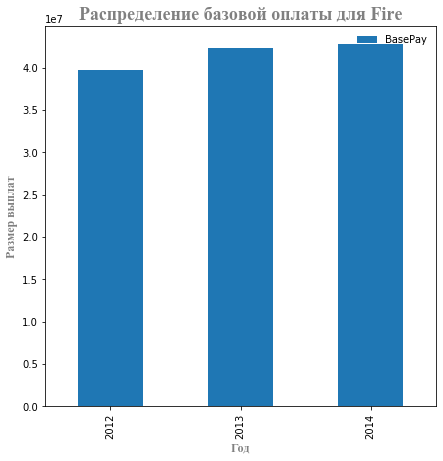

In [166]:
rcParams['figure.figsize']= 7,7

Fire_Base.plot(kind ='bar')
plt.title('Распределение базовой оплаты для Fire', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['BasePay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [105]:
#Получаем данные для графика по сверхурочным оплате для Fire
Fire_Over = df_salaries_fire.groupby('Year')['OvertimePay'].sum().head(10)
Fire_Over

Year
2012    6.368659e+06
2013    6.857566e+06
2014    6.605131e+06
Name: OvertimePay, dtype: float64

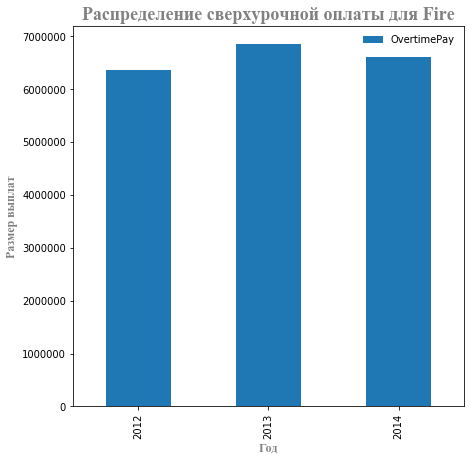

In [165]:
rcParams['figure.figsize']= 7,7

Fire_Over.plot(kind ='bar')
plt.title('Распределение сверхурочной оплаты для Fire', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['Overtime_Pay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [107]:
#Получаем данные для графика по сверхурочным оплате для Fire
Fire_Benefits = df_salaries_fire.groupby('Year')['Benefits'].sum().head(10)
Fire_Benefits

Year
2012    1.754524e+07
2013    1.651896e+07
2014    1.800341e+07
Name: Benefits, dtype: float64

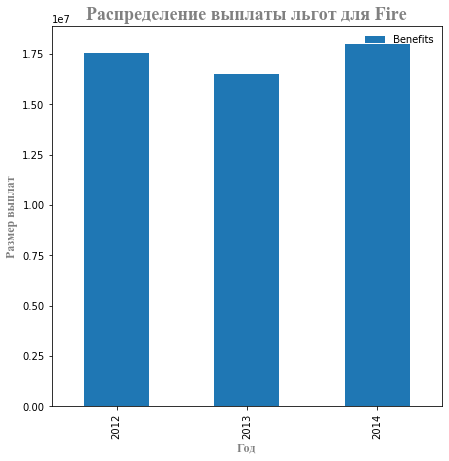

In [164]:
rcParams['figure.figsize']= 7,7

Fire_Benefits.plot(kind ='bar')
plt.title('Распределение выплаты льгот для Fire', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['Benefits'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

#### Сводные статистические данные по департаменту Medicine

In [110]:
df_salaries_medicine = df_salaries_graph.loc[~df_salaries_graph['Department'].isin(['Fire', 'Not dep', 'Other', 'Police'])]
df_salaries_medicine.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36164,36165,Amy Hart,Dept Head V,27160.774,0.000,19782.03,8468.182,291389.77,376071.59,2012,Medicine,3
36166,36167,John Martin,Dept Head V,28774.789,0.000,5274.57,8182.437,293022.46,374846.83,2012,Medicine,3
36185,36186,Trent Rhorer,Dept Head V,25364.980,0.000,6486.00,8066.061,260135.80,340796.41,2012,Medicine,3
36187,36188,Barbara Garcia,Dept Head V,25343.569,0.000,6486.00,7947.791,259921.69,339399.60,2012,Medicine,3
36200,36201,Ai Kyung Chung,Anesthetist,22722.189,569.399,16887.90,7855.411,249803.78,328357.89,2012,Medicine,3


In [115]:
#Получаем данные для графика по базовой оплате для Medicine
Medicine_Base = df_salaries_medicine.groupby('Year')['BasePay'].sum().head(10)
Medicine_Base

Year
2012    5.024282e+07
2013    5.401307e+07
2014    5.427229e+07
Name: BasePay, dtype: float64

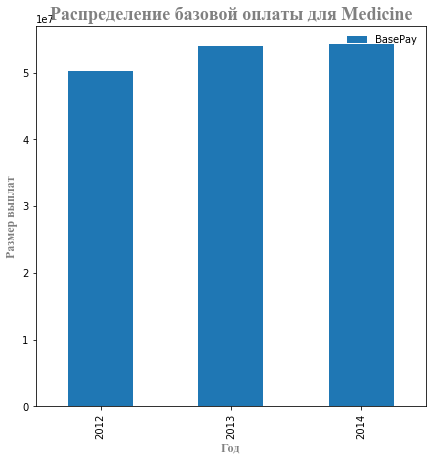

In [163]:
rcParams['figure.figsize']= 7,7

Medicine_Base.plot(kind ='bar')
plt.title('Распределение базовой оплаты для Medicine', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['BasePay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [116]:
#Получаем данные для графика по базовой оплате для Medicine
Medicine_Over = df_salaries_medicine.groupby('Year')['OvertimePay'].sum().head(10)
Medicine_Over

Year
2012    1.753169e+06
2013    1.919647e+06
2014    2.000979e+06
Name: OvertimePay, dtype: float64

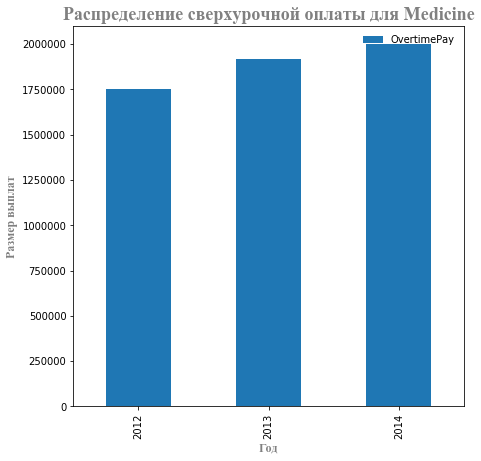

In [162]:
rcParams['figure.figsize']= 7,7

Medicine_Over.plot(kind ='bar')
plt.title('Распределение сверхурочной оплаты для Medicine', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['OvertimePay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [118]:
#Получаем данные для графика по базовой оплате для Medicine
Medicine_Benefits = df_salaries_medicine.groupby('Year')['Benefits'].sum().head(10)
Medicine_Benefits

Year
2012    1.967067e+07
2013    1.727040e+07
2014    1.861243e+07
Name: Benefits, dtype: float64

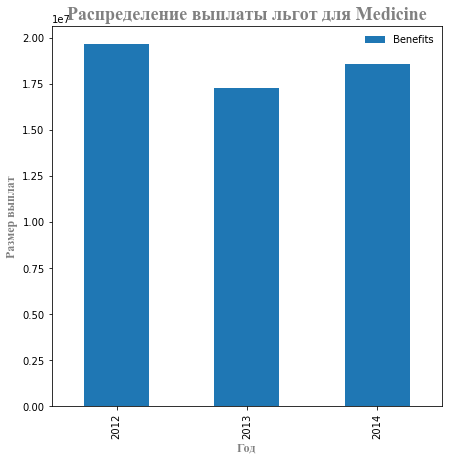

In [161]:
rcParams['figure.figsize']= 7,7

Medicine_Benefits.plot(kind ='bar')
plt.title('Распределение выплаты льгот для Medicine', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['Benefits'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

#### Сводные статистические данные по департаменту Police

In [121]:
df_salaries_police = df_salaries_graph.loc[~df_salaries_graph['Department'].isin(['Fire', 'Not dep', 'Other', 'Medicine'])]
df_salaries_police.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36175,36176,Ellen Moffatt,Asst Med Examiner,26052.826,339.490,20400.00,7301.712,284323.16,357340.28,2012,Police,1
36178,36179,Judy Melinek,Asst Med Examiner,26052.815,37.721,18425.37,7228.635,279330.73,351617.08,2012,Police,1
36203,36204,Venus Azar,Asst Med Examiner,24327.198,0.000,13708.15,6810.681,256980.13,325086.94,2012,Police,1
36225,36226,Heinz Hofmann,Lieutenant 3,8831.799,1146.937,183112.41,2317.783,282899.77,306077.60,2012,Police,1
36229,36230,Wing Chan,Incident Support Specialist,12074.010,12372.982,16194.51,4233.126,260664.43,302995.69,2012,Police,1


In [122]:
#Получаем данные для графика по базовой оплате для Medicine
Police_Base = df_salaries_police.groupby('Year')['BasePay'].sum().head(10)
Police_Base

Year
2012    6.674854e+07
2013    7.129409e+07
2014    6.784178e+07
Name: BasePay, dtype: float64

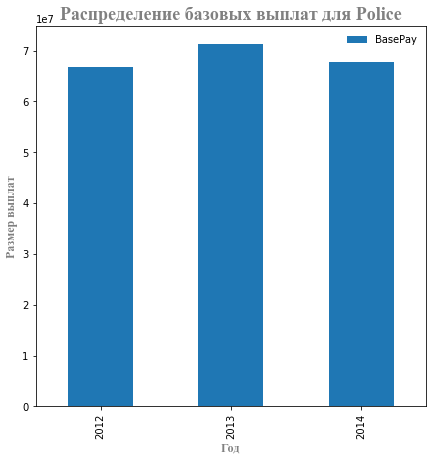

In [160]:
rcParams['figure.figsize']= 7,7

Police_Base.plot(kind ='bar')
plt.title('Распределение базовых выплат для Police', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['BasePay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [124]:
Police_Over = df_salaries_police.groupby('Year')['OvertimePay'].sum().head(10)
Police_Over

Year
2012    5.690194e+06
2013    6.081918e+06
2014    6.538616e+06
Name: OvertimePay, dtype: float64

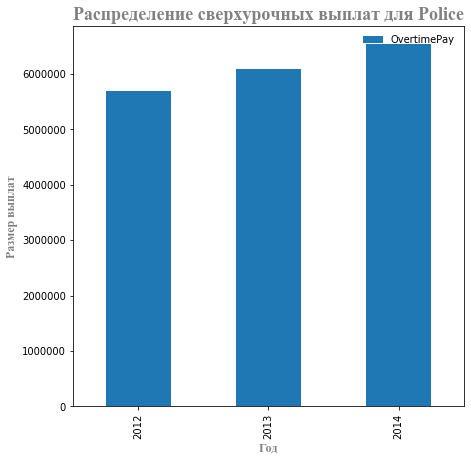

In [157]:
rcParams['figure.figsize']= 7,7

Police_Over.plot(kind ='bar')
plt.title('Распределение сверхурочных выплат для Police', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['OvertimePay'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

In [126]:
Police_Benefits = df_salaries_police.groupby('Year')['Benefits'].sum().head(10)
Police_Benefits

Year
2012    2.456764e+07
2013    2.350205e+07
2014    2.405300e+07
Name: Benefits, dtype: float64

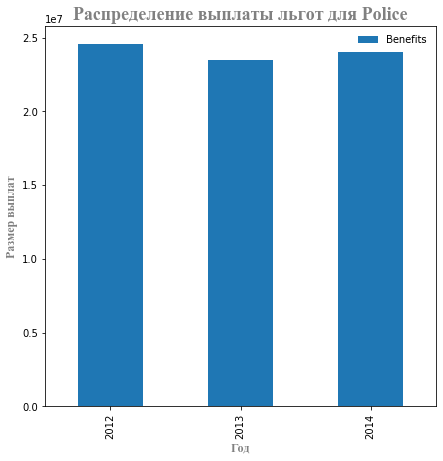

In [158]:
rcParams['figure.figsize']= 7,7

Police_Benefits.plot(kind ='bar')
plt.title('Распределение выплаты льгот для Police', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['Benefits'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

Выводы по итогам визуализации данных:

* Fire - Базовая оплата труда имеет положительную динамику от года к году. В 2013 году сотрудники этого департамента много работали сверхурочно, при этом, если учитывать выплаты льгот, то можно сделать вывод о том, что в том же 2013 году была превышена квота по сверхурочным и льгот было выплачено меньше чем в 2012 и 2014 годах. В целом динамика по всем блокам стабильная.

* Medicine - Базовая оплата труда имеет незначительную положительную динамику от года. При этом коллеги этого департамента от 2012 к 2014 стали работать больше сверхурочно, при этом обьем льгот имеет отрицательную динамику. Исходя из этого можно сделать вывод, что ежегодно базовая оплата для таких сотрудников индексировалась, в период 2012-2014 могла вырасти заболеваемость людей и потребовалось работать сверхурочно больше обычного. Это повлияло на квоты по льготам, которые практически пропорционально уменьшались.

* Police - Базовая оплата труда в 2013 году имеет более высокие показатели по отношению к 2012 и 2014. Вполне вероятно, что могла быть политическая напряженность и требовалась поддержка от органов правопорядка в этот период. При этом наблюдается также последовательный рост увеличения времени работы сверхурочно. Льготы имеют стабильную динамику с незначительным уменьшением в 2013. Можно предположить, что квоту льгот перераспределили на фонд базовой оплаты труда.

#### 3. Как распределяется бюджет на разные группы (department) с течением времени?

In [322]:
#Делаем копию исходного датафрейма
df_salaries_money = df_salaries_clean_2.copy(deep=True)
df_salaries_money.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,Other,2
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,Other,2


In [333]:
#Удаляем столбцы, не участвующие в агрегации
df_salaries_money_2 = df_salaries_money.drop(['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'Department_ML'], axis = 1)
df_salaries_money_2.head(3)

,Id,TotalPayBenefits,Year,Department
36159,36160,407274.78,2012,Fire
36160,36161,391362.30,2012,Other
36161,36162,389496.02,2012,Not dep


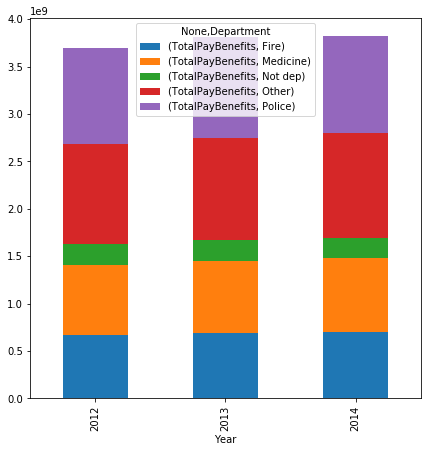

In [338]:
#Проводим группировку данных и строим график
df_salaries_money_2.groupby(['Year', 'Department']).agg({'TotalPayBenefits':sum}).sort_values(['Year','Department']).unstack(level=1).plot.bar(stacked=True)

In [330]:
#Передаем агрегированные ранее данные в новый df
df_graph = df_salaries_money_2.groupby(['Year', 'Department']).agg({'TotalPayBenefits':sum}).sort_values(['Year','Department'])

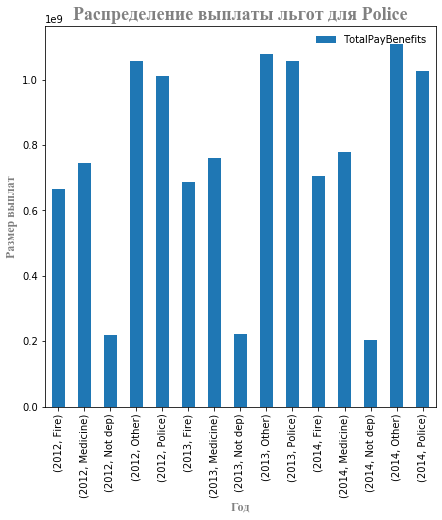

In [331]:
#Строим другой график в другом представлении
rcParams['figure.figsize']= 7,7

df_graph.plot(kind ='bar')
plt.title('Распределение выплаты льгот для Police', fontdict=title_dict)
plt.xlabel('Год', fontdict=labels_dict)
plt.ylabel('Размер выплат',fontdict=labels_dict)
plt.legend(labels=['Benefits'])
legend = plt.legend(loc='upper right', prop=legend_dict, frameon=False)
plt.show()

Выводы по итогам визуализации данных:
* Заметной разницы в распределении бюджета в разрезе нескольких лет между департаментами нет
* В 2014 (самый поздний год генеральной совокупности) наиболее заметными видятся изменения по отношению к другим годам в классах - Medicine (увеличилась доля по отношению ко всему бюджету), Police (уменьшилась доля по отношению ко всему бюджету)

#### 4. Какое количество людей в каждом департаменте? 

In [59]:
#Добавляем столбец для того чтобы при агрегации столбцов можно было посчитать количество единиц в одном классе
df_salaries_clean_2.insert(1, 'Counting', 1)

In [60]:
#проверяем результат insert'a
df_salaries_clean_2.head(3)

,Id,Counting,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department,Department_ML
36159,36160,1,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,Fire,4
36160,36161,1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,Other,2
36161,36162,1,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,Not dep,5


In [61]:
#проверяем, что столбец заполнен полностью и подходит для статистического подсчета
df_salaries_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111881 entries, 36159 to 148649
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111881 non-null  int64  
 1   Counting          111881 non-null  int64  
 2   EmployeeName      111881 non-null  object 
 3   JobTitle          111881 non-null  object 
 4   BasePay           111881 non-null  float64
 5   OvertimePay       111881 non-null  float64
 6   OtherPay          111881 non-null  float64
 7   Benefits          111881 non-null  float64
 8   TotalPay          111881 non-null  float64
 9   TotalPayBenefits  111881 non-null  float64
 10  Year              111881 non-null  int64  
 11  Department        111881 non-null  object 
 12  Department_ML     111881 non-null  object 
dtypes: float64(6), int64(3), object(4)
memory usage: 12.0+ MB


In [62]:
#агрегируем данные на основании подсчета по столбцу Counting в группировке Year и Department
df_salaries_clean_2.groupby(['Year', 'Department']).agg({'Counting':sum}).sort_values(['Year','Department'])

Counting
Year Department          
2012 Fire            5594
     Medicine        8830
     Not dep         2116
     Other          10854
     Police          9372
2013 Fire            5611
     Medicine        8918
     Not dep         2175
     Other          10676
     Police          9617
2014 Fire            6201
     Medicine        9242
     Not dep         1970
     Other          11142
     Police          9563

In [63]:
#Посчитаем общее количество единиц каждого класса данных в пределах всей выборки
df_salaries_clean_2.groupby('Department')['Id'].count().sort_values(ascending=False)

Department
Other       32672
Police      28552
Medicine    26990
Fire        17406
Not dep      6261
Name: Id, dtype: int64

#### 5. Какое количество людей с разным уровнем дохода? (гистограмма с шагом в 5к) 

In [169]:
#Определяем самое максимальное число в столбце TotalPayBenefits
df_salaries_clean_2['TotalPayBenefits'].sort_values(ascending = False)

110531    510732.68
110532    479652.21
110533    436224.36
72925     425815.28
72926     422353.40
            ...    
148629         0.00
148628         0.00
148627         0.00
148626         0.00
148649         0.00
Name: TotalPayBenefits, Length: 111881, dtype: float64

In [170]:
#Определяем количество bins (участков) для гистограммы с шагом в 5к
510733 / 5000

102.1466

In [178]:
#Определяем список для построения гистограммы
data = df_salaries_clean_2['TotalPayBenefits'].sort_values(ascending = True)

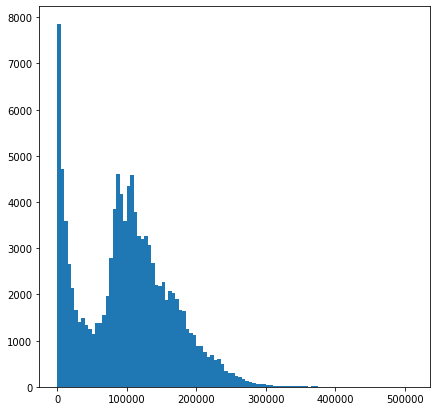

In [179]:
#Строим гистограмму с необходимым количеством bins
plt.hist(data, bins=102)
plt.show()

Полученные выводы:

* В приведенном дата сете большое количество разреженных данных в столбце с общим обьемом выплат. Есть вероятность неполноты данных и искажение итогового результата.

* Можно увидеть большой межклассовый разрыв между люьдми которые получают больше/меньше ~50к. 

* Если рассматривать гистограмму от ~50к, то распределение близко к нормальному. 

* В целом при заданных параметрах визуализации можно сделать вывод о том, что население Сан Франциско живет благополучно. Отдельный класс людей с доходом менее 50к. находится под риском. 

#### 6. На базе линейной регрессии постройте прогноз по тому, какие будут закупке в следующий год по каждому департаменту

#### Готовим датасеты

In [462]:
#Смотрим общее количество сущностей в таблице, ориентируемся на столбец Id
df_salaries_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111881 entries, 36159 to 148649
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111881 non-null  int64  
 1   EmployeeName      111881 non-null  object 
 2   JobTitle          111881 non-null  object 
 3   BasePay           111881 non-null  float64
 4   OvertimePay       111881 non-null  float64
 5   OtherPay          111881 non-null  float64
 6   Benefits          111881 non-null  float64
 7   TotalPay          111881 non-null  float64
 8   TotalPayBenefits  111881 non-null  float64
 9   Year              111881 non-null  int64  
 10  Department        111881 non-null  object 
 11  Department_ML     111881 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 15.1+ MB


In [463]:
#Предобрабатываем датафрейм и удаляем не нужные столбцы
df_salaries_clean_3 = df_salaries_clean_2.drop(['EmployeeName', 'JobTitle', 'Department'], axis = 1)
df_salaries_clean_3.head(3)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
36159,36160,128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,4
36160,36161,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,2
36161,36162,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,5


In [464]:
#Смотрим значение самого последнего элемента столбца Id
df_salaries_clean_3.tail(3)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
148647,148648,0.0,0.0,0.0,0.0,0.0,0.0,2014,4
148648,148649,0.0,0.0,0.0,0.0,0.0,0.0,2014,3
148649,148650,0.0,0.0,0.0,0.0,0.0,0.0,2014,3


In [465]:
#Определяем условие разбиения датасета на 2 части - 1ая для обучения модели, 2ая для проверок
df_salaries_clean_ml = df_salaries_clean_3[df_salaries_clean_3['Id'] >= 130000]
df_salaries_clean_work = df_salaries_clean_3[df_salaries_clean_3['Id'] < 130000]

In [466]:
#Проверяем результаты разбивки
df_salaries_clean_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18650 entries, 129999 to 148649
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                18650 non-null  int64  
 1   BasePay           18650 non-null  float64
 2   OvertimePay       18650 non-null  float64
 3   OtherPay          18650 non-null  float64
 4   Benefits          18650 non-null  float64
 5   TotalPay          18650 non-null  float64
 6   TotalPayBenefits  18650 non-null  float64
 7   Year              18650 non-null  int64  
 8   Department_ML     18650 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 1.4+ MB


In [467]:
df_salaries_clean_work.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93231 entries, 36159 to 129998
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                93231 non-null  int64  
 1   BasePay           93231 non-null  float64
 2   OvertimePay       93231 non-null  float64
 3   OtherPay          93231 non-null  float64
 4   Benefits          93231 non-null  float64
 5   TotalPay          93231 non-null  float64
 6   TotalPayBenefits  93231 non-null  float64
 7   Year              93231 non-null  int64  
 8   Department_ML     93231 non-null  object 
dtypes: float64(6), int64(2), object(1)
memory usage: 7.1+ MB


In [468]:
#Заменяем значение столбца Year на нужный будущий период для того чтобы потом опробовать модель ML
df_salaries_clean_ml['Year'] = '2015'

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [469]:
df_salaries_clean_ml.head(3)

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
129999,130000,64533.59,4507.38,1637.13,28884.13,70678.10,99562.23,2015,4
130000,130001,73568.39,0.00,674.79,25316.83,74243.18,99560.01,2015,3
130001,130002,53121.03,18662.08,1160.00,26609.64,72943.11,99552.75,2015,3


In [470]:
#удаляем из каждого датафрейма столбец ID. Данный столбец не информативен 
#для обучения модели
df_salaries_clean_ml = df_salaries_clean_ml.drop(['Id'], axis = 1)
df_salaries_clean_work = df_salaries_clean_work.drop(['Id'], axis = 1)

In [460]:
#Проверяем результат удаления на примере одного из df
df_salaries_clean_ml.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
129999,64533.59,4507.38,1637.13,28884.13,70678.10,99562.23,2015,4
130000,73568.39,0.00,674.79,25316.83,74243.18,99560.01,2015,3
130001,53121.03,18662.08,1160.00,26609.64,72943.11,99552.75,2015,3


#### Обучаем модель

In [543]:
df_salaries_clean_work.head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
36159,128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,4
36160,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,2
36161,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,5
36162,296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,2
36163,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,2


In [544]:
#Наша модель будет предсказывать показатель TotalPayBenefits
#Определяем фичи и таргет в сете df_salaries_clean_work
x = df_salaries_clean_work.drop('TotalPayBenefits',axis=1)
y = df_salaries_clean_work['TotalPayBenefits']

In [545]:
x.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
36159,128808.87,220909.48,13126.31,44430.12,362844.66,2012,4
36160,302578.00,0.00,18974.11,69810.19,321552.11,2012,2
36161,111921.00,146415.32,78057.41,53102.29,336393.73,2012,5


In [546]:
#с помощью модуля sklearn проведем препроцессинг и нормализуем числа, чтобы 
#модель обучалась на данных одинаковой размерности
df_sal = preprocessing.normalize(x, axis=0)
x = pd.DataFrame(df_sal, columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'Year', 'Department_ML'])
x.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
0,0.004910,0.051447,0.004506,0.004641,0.012026,0.003274,0.004780
1,0.011535,0.000000,0.006513,0.007292,0.010658,0.003274,0.002390
2,0.004267,0.034098,0.026796,0.005547,0.011149,0.003274,0.005974


In [547]:
y

36159     407274.78
36160     391362.30
36161     389496.02
36162     386807.48
36163     381643.11
            ...    
129994     99568.81
129995     99564.11
129996     99564.10
129997     99564.08
129998     99563.88
Name: TotalPayBenefits, Length: 93231, dtype: float64

In [548]:
#Разбиваем выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [549]:
X_train.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
76254,0.005260,0.003344,0.002940,0.004472,0.005333,0.003277,0.001195
41841,0.004371,0.002747,0.004058,0.003952,0.004583,0.003275,0.001195
8284,0.003369,0.003134,0.003600,0.003774,0.003723,0.003274,0.001195
11852,0.003388,0.000000,0.000614,0.003864,0.003005,0.003274,0.002390
34444,0.000105,0.000316,0.000000,0.000033,0.000136,0.003274,0.002390


In [550]:
y_train

113022    203717.03
78000     176095.04
44443     148444.45
48011     127661.80
70603       4435.88
            ...    
42424     162222.55
91052     104281.33
113588    196239.78
37019     230499.57
51954     110406.38
Name: TotalPayBenefits, Length: 74584, dtype: float64

In [551]:
model_total = LinearRegression()
model_total.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [614]:
X_test

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
75183,0.006008,0.002312,0.003467,0.005008,0.005888,0.003277,0.001195
21030,0.002089,0.000000,0.000000,0.003823,0.001816,0.003274,0.002390
57431,0.002282,0.001880,0.000755,0.002520,0.002324,0.003275,0.002390
16370,0.002270,0.002920,0.000580,0.003598,0.002445,0.003274,0.004780
67124,0.000949,0.000000,0.000000,0.000026,0.000825,0.003275,0.004780
...,...,...,...,...,...,...,...
50900,0.003326,0.000000,0.000192,0.003254,0.002910,0.003275,0.002390
43150,0.004601,0.000000,0.000551,0.004544,0.004054,0.003275,0.002390
7829,0.002550,0.006108,0.009678,0.003088,0.004021,0.003274,0.001195
11210,0.003102,0.001037,0.002759,0.003857,0.003111,0.003274,0.005974


In [822]:
pred_total = model_total.predict(X_test)

In [823]:
pred_total

array([225576.34,  91405.85,  94257.9 , ..., 150887.27, 130789.57,
       142806.11])

In [554]:
y_test

111951    225576.34
57189      91405.85
93600      94257.90
52529     108209.40
103311     25136.88
            ...    
87063     118955.39
79309     165801.78
43988     150887.27
47369     130789.57
82324     142806.11
Name: TotalPayBenefits, Length: 18647, dtype: float64

In [555]:
print('Ошибка MSE=',mean_squared_error(y_test,pred_total, squared=True))
print('Ошибка MAE =',mean_absolute_error(y_test,pred_total))

Ошибка MSE= 3.8132820616763706e-21
Ошибка MAE = 4.134232406908505e-11


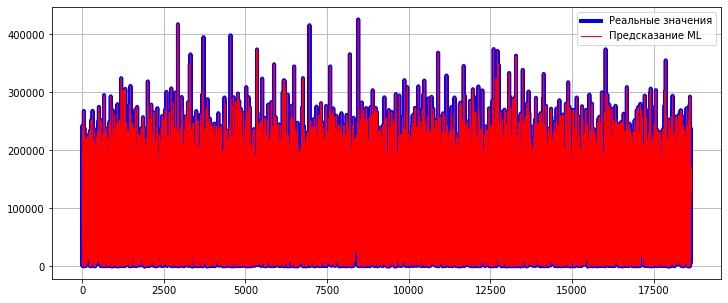

In [597]:
#Сравним показатели таргета в исходном и обученном виде
plt.figure(figsize=(12,5))
plt.plot(y_test.values, "blue", linewidth=4, label = 'Реальные значения')
plt.plot(pred_total, "red", linewidth=1, label = 'Предсказание ML')
plt.legend(loc='best')
plt.grid(True)
plt.show()

Предскажем показатели на будущий период

In [824]:
df_salaries_clean_ml.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
0,64533.59,4507.38,1637.13,28884.13,70678.10,99562.23,2015,4
1,73568.39,0.00,674.79,25316.83,74243.18,99560.01,2015,3
2,53121.03,18662.08,1160.00,26609.64,72943.11,99552.75,2015,3
3,63978.05,3582.57,3394.59,28587.01,70955.21,99542.22,2015,2
4,64016.63,6957.26,2718.94,25846.25,73692.83,99539.08,2015,2


In [825]:
#Определяем фичи и таргет в сете df_salaries_clean_ml
x1 = df_salaries_clean_ml.drop('TotalPayBenefits',axis=1)
y1 = df_salaries_clean_ml['TotalPayBenefits']

In [826]:
x1.head(5)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
0,64533.59,4507.38,1637.13,28884.13,70678.10,2015,4
1,73568.39,0.00,674.79,25316.83,74243.18,2015,3
2,53121.03,18662.08,1160.00,26609.64,72943.11,2015,3
3,63978.05,3582.57,3394.59,28587.01,70955.21,2015,2
4,64016.63,6957.26,2718.94,25846.25,73692.83,2015,2


In [838]:
#уменьшение размерности данных дата сета
df_sal_1 = preprocessing.normalize(x1, axis=0)
x1 = pd.DataFrame(df_sal_1, columns = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'Year', 'Department_ML'])
x1.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Department_ML
0,0.012163,0.011625,0.003351,0.012472,0.012451,0.007323,0.010816
1,0.013866,0.000000,0.001381,0.010931,0.013079,0.007323,0.008112
2,0.010012,0.048130,0.002374,0.011490,0.012850,0.007323,0.008112


In [839]:
pred_total_1 = model_total.predict(x1)

In [840]:
pred_total_1

array([4.96777874e+05, 4.84216259e+05, 5.47269089e+05, ...,
       3.77799002e-10, 3.78482448e-10, 3.78482448e-10])

In [851]:
#Преобразовываем в список, чтобы потом преобразовать в датафрейм
df_pred = pred_total_1.tolist()

In [848]:
df_pred_1 = pd.DataFrame(df_pred, columns = ['Predict'])
df_pred_1

,Predict
0,4.967779e+05
1,4.842163e+05
2,5.472691e+05
3,4.947925e+05
4,5.086462e+05
...,...
18645,3.771156e-10
18646,3.791659e-10
18647,3.777990e-10
18648,3.784824e-10


In [849]:
#Обновляем индексы, чтобы произвести конкатенацию датасетов
df_salaries_clean_ml = df_salaries_clean_ml.reset_index(drop=True)
df_salaries_clean_ml.head(3)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML
0,64533.59,4507.38,1637.13,28884.13,70678.10,99562.23,2015,4
1,73568.39,0.00,674.79,25316.83,74243.18,99560.01,2015,3
2,53121.03,18662.08,1160.00,26609.64,72943.11,99552.75,2015,3


In [850]:
result = df_salaries_clean_ml.join(df_pred_1, rsuffix='_left')
result

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Department_ML,Predict
0,64533.59,4507.38,1637.13,28884.13,70678.10,99562.23,2015,4,4.967779e+05
1,73568.39,0.00,674.79,25316.83,74243.18,99560.01,2015,3,4.842163e+05
2,53121.03,18662.08,1160.00,26609.64,72943.11,99552.75,2015,3,5.472691e+05
3,63978.05,3582.57,3394.59,28587.01,70955.21,99542.22,2015,2,4.947925e+05
4,64016.63,6957.26,2718.94,25846.25,73692.83,99539.08,2015,2,5.086462e+05
...,...,...,...,...,...,...,...,...,...
18645,0.00,0.00,0.00,0.00,0.00,0.00,2015,5,3.771156e-10
18646,0.00,0.00,0.00,0.00,0.00,0.00,2015,2,3.791659e-10
18647,0.00,0.00,0.00,0.00,0.00,0.00,2015,4,3.777990e-10
18648,0.00,0.00,0.00,0.00,0.00,0.00,2015,3,3.784824e-10


In [ ]:
#Необходимо найти способ для преобразования значений Predict и далее уже 
#агрегировать по условию задачи